In [4]:
#import libraries
import pandas as pd #for data analysis
import numpy as np #for numerical operations
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns

In [7]:
#create data frames to read the csv file in jupyter notebook
dataframe = pd.read_csv("zomato data .csv")

In [8]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
#cleaning the data - col rate
def RateChange(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(RateChange)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
#checking summary to see any  null value
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'type of restaurant')

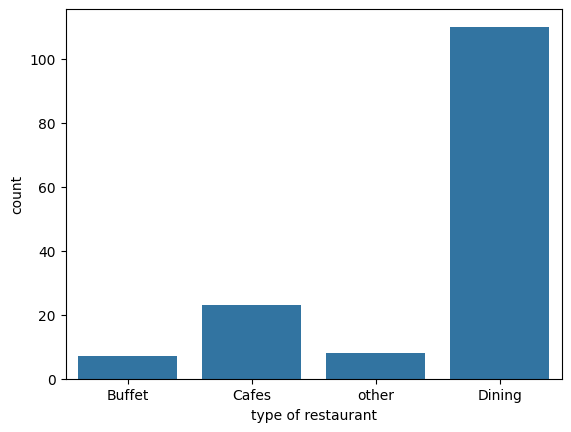

In [11]:
#Which type of restaurant do most customers typically order from?
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

Text(0, 0.5, 'votes')

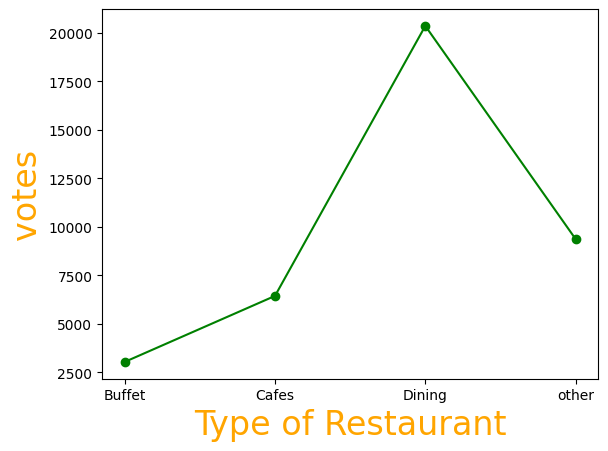

In [18]:
#which type of restaurant has more number of votes
grouped_data = dataframe.groupby('listed_in(type)') ['votes'].sum()
result= pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of Restaurant", c="orange", size=24)
plt.ylabel("votes", c="orange", size= 24)


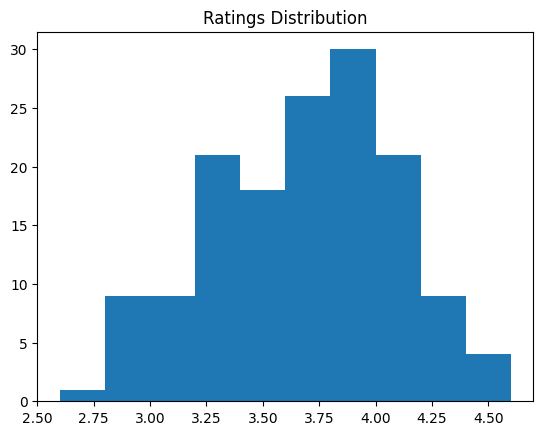

In [19]:
#What are the ratings that most restaurants have earned
plt.hist(dataframe['rate'], bins= 10)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

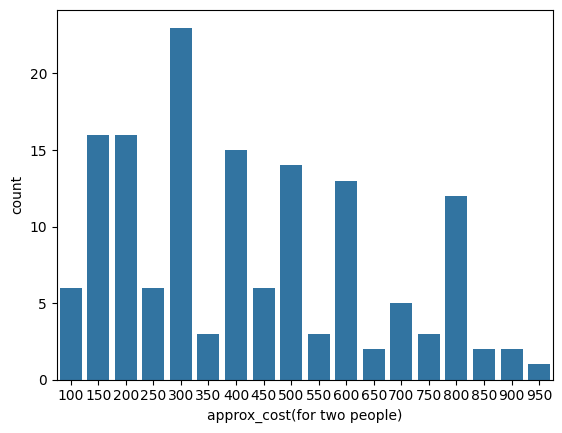

In [20]:
#what is the average cost spending of two people
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

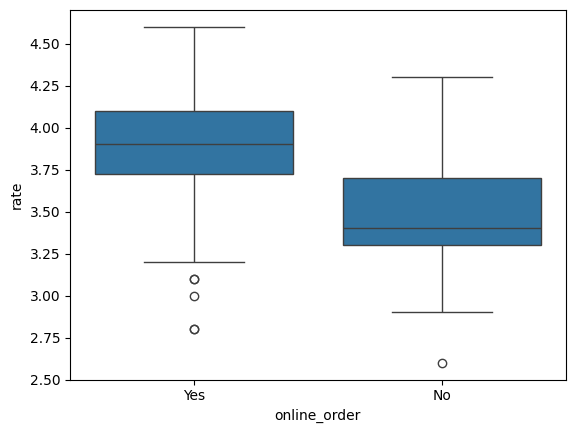

In [23]:
#which mode receives maximum rating
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)